In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy.stats as stats
import sys
import os
import re
import thinkstats2
import thinkplot
import random
%matplotlib inline

In [2]:
# Exercise 7.1 Using data from the NSFG, make a scatter plot of birth weight versus 
# mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s 
# and Spearman’s correlations. How would you characterize the relationship between 
# these variables?

In [3]:
# DataFrame.corr(method='pearson', min_periods=1)
# methods, 'pearson', 'kendall', 'spearman'

In [4]:
import first

In [5]:
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb']) # this is a DF, dropnans, looking at two 

In [6]:
type(live)

pandas.core.frame.DataFrame

In [7]:
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [8]:
ages = live['agepreg']
weights = live['totalwgt_lb']

In [9]:
df1 = pd.concat([ages, weights], axis=1)

In [10]:
df1.corr(method='pearson')

,agepreg,totalwgt_lb
agepreg,1.000000,0.068834
totalwgt_lb,0.068834,1.000000


In [11]:
df1.corr(method='spearman')

,agepreg,totalwgt_lb
agepreg,1.00000,0.09461
totalwgt_lb,0.09461,1.00000


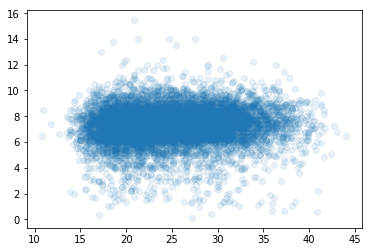

In [12]:
plt.pyplot.figure()
plt.pyplot.scatter(ages, weights, alpha=0.1)


In [13]:
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
percentile = np.percentile(df1, p)

0.125 7.375 13.54 24.33 44.08


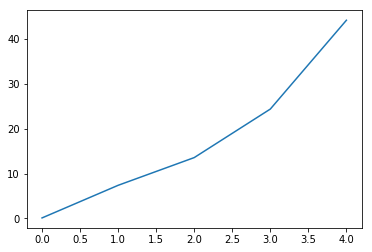

In [14]:
plt.pyplot.plot(percentile)
print(percentile[0], percentile[1], percentile[2], percentile[3], percentile[4])

In [15]:
# Ultimately the scatter seems to show a weak relationship between birthweight and monthprg
# The correlations also support this with the Pearson around 0.0688 and Spearman 0.0946
# Plotting the percentiles as weight vs age is also non-linear.  The slope of birthweight
# increases more quickly at 25-45 weeks and initially bumps between 15 and 25 weeks

In [30]:
#Exercise 8.2 Suppose you draw a sample with size n = 10 from an exponen- tial distribution 
#with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the 
#estimate L. Compute the standard error of the estimate and the 90% confidence interval.
#Repeat the experiment with a few different values of n and make a plot of standard 
#error versus n.

In [31]:
def simulated_sample(lamd = 2.0, n=10, iterations=1000):
    def vertline(x, y=1):
        plt.pyplot.plot([x, x], [0, y])
    
    def RMSE(estimates, actual):
        e2 = [(estimate-actual)**2 for estimate in estimates]
        mse = np.mean(e2)
        return np.sqrt(mse)
    
    estimates = []
    for _ in range(iterations):
        xs = np.random.exponential(1.0/lamd, n)
        lambar = 1.0 / np.mean(xs)
        xs = np.array(xs)
        estimates.append(lambar)
        
    stderr = RMSE(estimates, lamd)
    print('Standard Error: ', stderr)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    vertline(ci[0])
    vertline(ci[1])
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')
    return stderr

Standard Error:  0.762307239738
confidence interval (1.2784287577742679, 3.5899732898483308)


0.76230723973786862

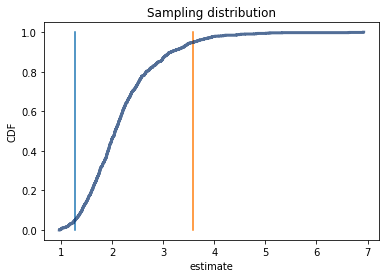

In [32]:
simulated_sample()

In [33]:
# EXCERCISE 8,3 - Games like hockey ans soccer

In [34]:
def sim_game(lamd):
    goals = 0 # set base
    t = 0 # set base
    while True:
        time_between_goals = random.expovariate(lamd)
        t += time_between_goals # incr up time
        if t > 1:
            break
        goals += 1
    L = goals # estimated goal-scoring rate is the actual number of goals scored
    return L

RMSE L:  1.41441648746
ME L:  -0.00228


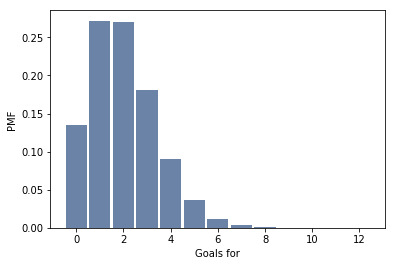

In [35]:
def estimate_games(lamd=2, num=1000000):
    
    def RMSE(estimates, actual):
        e2 = [(estimate-actual)**2 for estimate in estimates]
        mse = np.mean(e2)
        return np.sqrt(mse)
    
    def meanerror(estimates, actual):
        errors = [estimate-actual for estimate in estimates]
        return np.mean(errors)
    
    estimates = []
    for num in range(num):
        L = sim_game(lamd)
        estimates.append(L)
        
    print('RMSE L: ', RMSE(estimates, lamd))
    print('ME L: ', meanerror(estimates, lamd))
    
    PMF = thinkstats2.Pmf(estimates)
    thinkplot.Hist(PMF)
    thinkplot.Config(xlabel='Goals for', ylabel='PMF')

estimate_games()

In [36]:
# ME is small and decreasing with an increase in games played, so as an estimator
# this appears ubiased.

In [37]:
# Chapter 6.1 Income Skewed to the right.


In [38]:
def data_view(df, log_upper=6.0):
    df.log_upper = np.log10(df.income)
    df.log_lower = df.log_upper.shift(1) # getting lower by shifting upper over one
    df.loc[0, 'log_lower'] = 3.0 
    df.loc[40, 'log_upper'] = log_upper # fill in a value for unkown upper of highest range
    # use columns to generate the correct num of values in ranges
    arrays = []
    for num, row in df.iterrows():
        values = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(values)
        
    # put them together
    log_sample = np.concatenate(arrays)
    return log_sample

In [39]:
import hinc # data reader
income_df = hinc.ReadData()
log_sample = data_view(income_df, log_upper=6.0)

/Users/alexanderkunkel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


In [ ]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [ ]:
sample = np.power(10, log_sample)

In [ ]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

In [ ]:
Mean(sample), Median(sample)

In [ ]:
Skewness(sample), PearsonMedianSkewness(sample)

In [ ]:
cdf.Prob(Mean(sample))